<a href="https://colab.research.google.com/github/pattichis/AIML/blob/main/Session_10_1_NN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nearest Neighbor Classification

Goals

1. Introduction to classification.
2. Review Pythagorean theorem.
3. Compute nearest neighbors.
4. Compute K-nearest neighbors.
5. A preview of K-nearest neighbor classification.

References:<br>
1. [K-nearest neighbor classification in Scikit Learn](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
2. Animations were created with help from ChatGPT.

# Introduction to classification

Suppose that we associate 2D coordinates for houses in your neighborhood.

Suppose that we want to determine whether your house has pets based on your location.

Our basic idea is the following:
```
 Suppose that we are looking at a new house.
 We do not know whether the house has pets.

 However, we assume that if the neighbors have pets,
 then it is likely that the new house will also have pet(s).

 As an example, we have:
   House 1: location=(0, 1.2).   Has pets.
   House 2: location=(2.1, 3.4). No pets.
   House 3: location=(4.2, 5.6). No pets.
```

Suppose that we are looking at a new house with:
```
   House N: location=(0, 1). Does it have pets?
```
This is very close to House 1!<br>
Can we say that it has pets because House 1 has pets?

We need to develop:
```
1. How do you measure distances?
2. How do you find neighbors?
3. How do you determine if a NEW house has pets from its neighbors? (classification rule).
```




# Review Pythagorean theorem

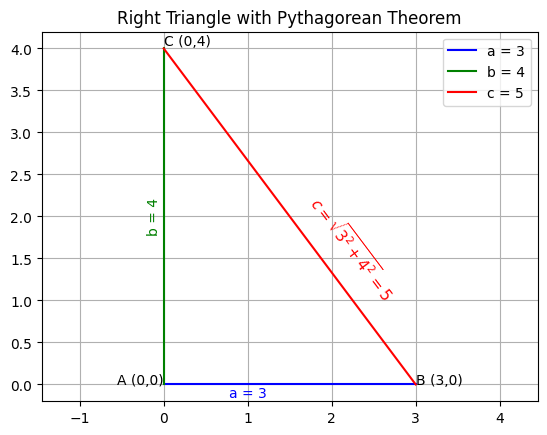

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Triangle vertices
A = np.array([0, 0])
B = np.array([3, 0])  # horizontal leg (a = 3)
C = np.array([0, 4])  # vertical leg (b = 4)

# Plot the triangle sides
plt.plot([A[0], B[0]], [A[1], B[1]], 'b', label='a = 3')
plt.plot([A[0], C[0]], [A[1], C[1]], 'g', label='b = 4')
plt.plot([B[0], C[0]], [B[1], C[1]], 'r', label='c = 5')

# Add point labels
plt.text(*A, 'A (0,0)', fontsize=10, ha='right')
plt.text(*B, 'B (3,0)', fontsize=10, ha='left')
plt.text(*C, 'C (0,4)', fontsize=10, va='bottom')

# Add side length labels
plt.text(1.0, -0.15, 'a = 3', fontsize=10, ha='center', color='blue')     # Bottom side
plt.text(-0.2, 2, 'b = 4', fontsize=10, va='center', rotation=90, color='green')  # Left side
plt.text(1.7, 1, r'$c = \sqrt{3^2 + 4^2} = 5$', fontsize=11, color='red', rotation=-53)


# Formatting
plt.axis('equal')
plt.grid(True)
plt.title("Right Triangle with Pythagorean Theorem")
plt.legend()
plt.show()

We can do the same calculation using coordinates!<br>
1. Take the x-coordinates (first coordinate) for B and C:
$$ 0 - 3 = -3$$
2. Square it:
$$ (-3)^2 = 3^2 = 9 $$
3. Repeat for y-coordinates (second coordinate) for B and C:
$$ 4 - 0 = 4 $$
4. Square it:
$$ 4^2 = 16 $$
5. Take the square root:
$$ \sqrt{(3^2 + 4^2)} = \sqrt{(5^2)} = 5. $$

# Assignment

Calculate the distance between the following points:<br>
1. Pt1=(0, 3). Pt2=(0, 4).
2. Pt1=(1, 0). Pt2=(2, 0).
3. Pt1=(0, 0). Pt2=(3, 4).
4. Pt1=(1, 2). Pt2=(4, 6).

In [19]:
import math

print("Problem 1: ", math.sqrt((0-3)**2 + (0-4)**2))

Problem 1:  5.0


# Nearest neighbor

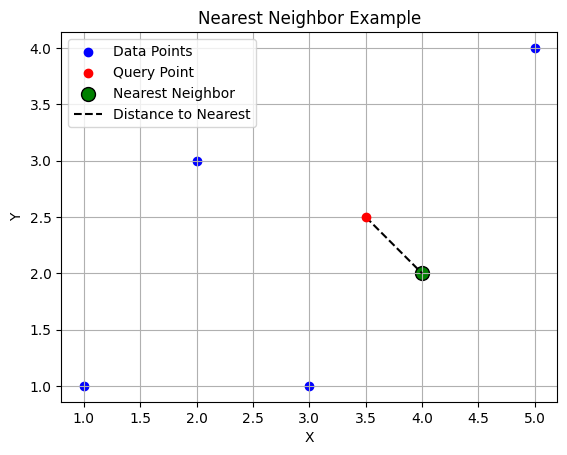

In [20]:
# IGNORE THE CODE. FOCUS ON THE PLOT

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

# Sample data points (e.g. training data)
data_points = np.array([
    [1, 1],
    [2, 3],
    [3, 1],
    [5, 4],
    [4, 2]
])

# Query point (e.g. new point to classify)
query_point = np.array([3.5, 2.5])

# Compute distances to all data points
distances = [distance.euclidean(query_point, p) for p in data_points]
nearest_index = np.argmin(distances)
nearest_point = data_points[nearest_index]

# Plot all data points
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
plt.scatter(*query_point, color='red', label='Query Point', zorder=5)
plt.scatter(*nearest_point, color='green', label='Nearest Neighbor', edgecolor='black', s=100)

# Draw line from query point to nearest neighbor
plt.plot([query_point[0], nearest_point[0]],
         [query_point[1], nearest_point[1]],
         'k--', label='Distance to Nearest')

# Add labels and formatting
plt.title('Nearest Neighbor Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Assignment

Consider the following points on the line:
```
[0, 0], [0, 1], [0, 2], [0, 3].
```
Which point is closest to:
1. [0, -1]?
2. [0, 1.5]?
3. [0, 6]?
4. [0, 1.1]?



Consider the following points on the line:
```
[0, 0], [1, 2], [0, 2].
```
Which point is closest to:
1. [1, 1]?


In [21]:
import math

print("Distance ... ", math.sqrt((0-3)**2 + (0-4)**2))

Distance ...  5.0


# Nearest Neighbor Animation

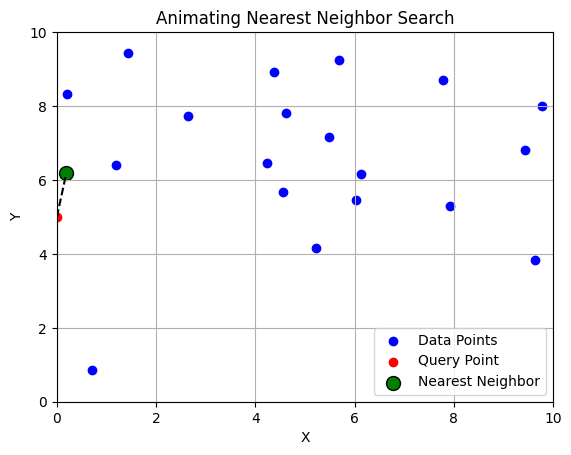

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.spatial import distance
from IPython.display import HTML

# Random data points
np.random.seed(0)
data_points = np.random.rand(20, 2) * 10

# Query path (sweep horizontally with sine wave)
x_vals = np.linspace(0, 10, 100)
y_vals = 5 + np.sin(x_vals)

# Set up the plot
fig, ax = plt.subplots()
sc_data = ax.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
sc_query = ax.scatter([], [], color='red', label='Query Point')
sc_nearest = ax.scatter([], [], color='green', edgecolor='black', s=100, label='Nearest Neighbor')
line, = ax.plot([], [], 'k--')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Animating Nearest Neighbor Search')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
ax.legend()

# Animation update function
def update(frame):
    query = np.array([x_vals[frame], y_vals[frame]])
    distances = [distance.euclidean(query, p) for p in data_points]
    nearest_idx = np.argmin(distances)
    nearest = data_points[nearest_idx]
    sc_query.set_offsets([query])
    sc_nearest.set_offsets([nearest])
    line.set_data([query[0], nearest[0]], [query[1], nearest[1]])
    return sc_query, sc_nearest, line

# Create animation
ani = FuncAnimation(fig, update, frames=len(x_vals), interval=100)


# Display in Colab as HTML5 video
from matplotlib.animation import PillowWriter
from matplotlib import rc
rc('animation', html='html5')

HTML(ani.to_html5_video())

# K-Nearest neighbors

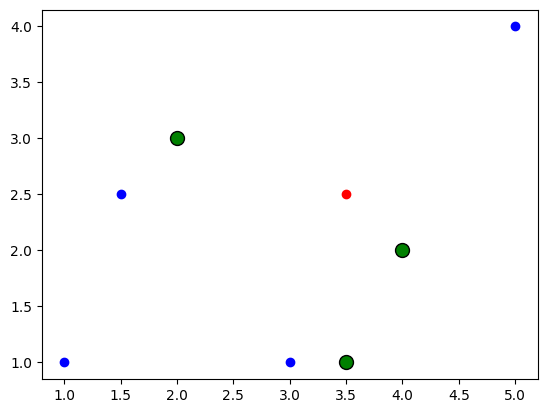

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

# Sample data points (e.g. training data)
data_points = np.array([
    [1, 1],
    [2, 3],
    [3, 1],
    [5, 4],
    [4, 2],
    [1.5, 2.5],
    [3.5, 1]
])

# Query point (e.g. new point to classify)
query_point = np.array([3.5, 2.5])

# Compute distances to all data points
distances = [distance.euclidean(query_point, p) for p in data_points]

# Get indices of the 3 nearest neighbors
k = 3
nearest_indices = np.argsort(distances)[:k]
nearest_points = data_points[nearest_indices]

# Plot all data points
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
plt.scatter(*query_point, color='red', label='Query Point', zorder=5)
plt.scatter(nearest_points[:, 0], nearest_points[:, 1],
            color='green', label=f'{k} Nearest Neighbors', edgecolor='black', s=100)

# Draw dashed lines from query


Assignment

Consider the following points on the line:
```
[0, 0], [0, 1], [0, 2], [0, 3].
```
Which are the three points closest to:
1. [0, -1]?
2. [0, 1.5]?



# Assigning labels to points

Recall our original classification problem.

We now assign labels to each house:
```
   House 1: location=(0, 1.2).   Has pets. Assign label A.
   House 2: location=(2.1, 3.4). No pets.  Assign label B.
   House 3: location=(4.2, 5.6). No pets.  Assign label B.
   ...
```
For a new house, we want to use the neighbor's labels to determine whether it is likely to have pets!




# K-nearest neighbor classification rule

1. Identify the categories among the K-nearest neighbors.
2. For the new point, assign the category with the largest number of members.

Example 1.

Suppose that we have the 3-nearest neighbors with the following labels:<br>
```
    A, A, A.
```
Then the output will be:
```
    A
```




Example 2.

Suppose that we have the 3-nearest neighbors are:<br>
```
    B, A, B.
```
Then the output will be:
```
    B
```




# Assignment

What is the output for the following cases?
```
1. B, B, B.
```
```
2. A, B, B.
```
```
3. C, C, B.
```
```
4. A, C, B.
```




# K-Nearest neighbor classification with weight=distance

In the previous example, we did not use the distances to each point!

Suppose that we use both the distance and category.<br>
Suppose that we have the following three points:
```
A with distance=1, B with distance=100, B with distance=1000.
```
We then total 1/distance for each category:
```
For A: 1/1 = 1.
For B: 1/100 + 1/1000 = 0.011

We have 1 > 0.011.
Thus, the point is classified as category A.
```






# Assignment

For each one of the following cases, determine the final category:
```
1. A with distance=10, B with distance=100, B with distance=1000.
2. A with distance=1, B with distance=2, C with distance=3.
3. A with distance=1, B with distance=2, B with distance=3.
```



# 3-class problems examples

Do you think nearest neighbor classification will work here? Explain.

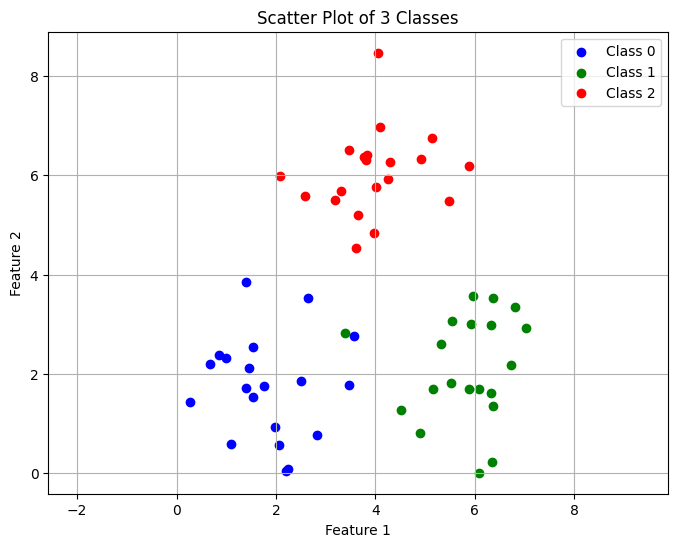

In [24]:
# IGNORE the code! Look at the plot!

import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate 3 clusters of points (each representing a class)
class_0 = np.random.randn(20, 2) + [2, 2]   # Cluster near (2,2)
class_1 = np.random.randn(20, 2) + [6, 2]   # Cluster near (6,2)
class_2 = np.random.randn(20, 2) + [4, 6]   # Cluster near (4,6)

# Combine all points
X = np.vstack((class_0, class_1, class_2))
y = np.array([0]*20 + [1]*20 + [2]*20)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='red', label='Class 2')

plt.title("Scatter Plot of 3 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# A second example of 3 classes.

Why is this example more complicated?
Explain.

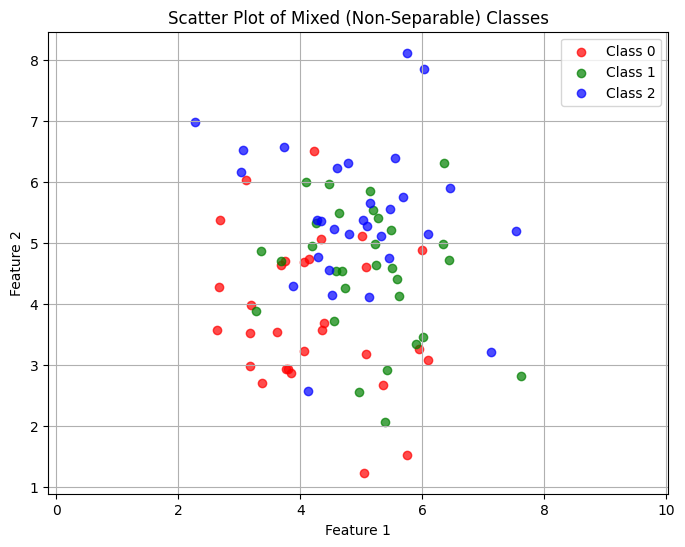

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed
np.random.seed(1)

# Generate 3 overlapping clusters
class_0 = np.random.randn(30, 2) * 1.2 + [4, 4]
class_1 = np.random.randn(30, 2) * 1.2 + [5, 4.5]
class_2 = np.random.randn(30, 2) * 1.2 + [4.5, 5.5]

# Combine into single dataset
X = np.vstack((class_0, class_1, class_2))
y = np.array([0]*30 + [1]*30 + [2]*30)

# Plot with red, green, blue
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', alpha=0.7)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='blue', label='Class 2', alpha=0.7)

plt.title("Scatter Plot of Mixed (Non-Separable) Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Real-life example


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
print("type(iris) = ", type(iris))

# Dictionary access
print("type(iris.data) = ", type(iris.data))
print(" ")

X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target


print("X.shape = ", X.shape)
print("X = \n", X)
print("What is X? Explain")
print(" ")

print("y.shape = ", y.shape)
print("y = \n", y)
print("What is y? Explain")

type(iris) =  <class 'sklearn.utils._bunch.Bunch'>
type(iris.data) =  <class 'pandas.core.frame.DataFrame'>
 
X.shape =  (150, 2)
X = 
      sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
What is X? Explain
 
y.shape =  (150,)
y = 
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
What is y? Explain


# Splitting the dataset into training and testing datasets

In Machine Learning and AI problems, we split the data between training and testing.

To understand the problem, consider developing a method for detecting.

Training dataset: This is the dataset where we know the categories. For example, if we

1. Study the split between training and testing.


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)
print("What is the percentage of the total samples used for training?")
print("What is the percentage of the total samples used for testing?")

X_train.shape =  (112, 2)
X_test.shape =  (38, 2)
What is the percentage of the total samples used for training?
What is the percentage of the total samples used for testing?


# Define nearest neighbor classifier

Identify the classifier from the import functions below.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Study the code below.

Note that the Pipeline executes a standard set of data transformations with an optional predictor at the end. The input here is the Knn classifier.


The help line below shows <b>inheritence</b> from many different classes.
```
class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
```
This means that the new class uses methods (functions) from many other classes.

The help line below shows the parameters:
```
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
```
Note the use of:
* All the parameters use keywords.
* "*" is just meant to mark the separation between parameters.
* all the keywords have default values.

Especially note:
*  n_neighbors: controls the number of nearest neighbors. Vary this!
* weights: is either 'uniform' (no distance) or 'distance' (see above).
* set_params() is a method to control how the algorithm runs. Its input is a dictionary.
* metric: controls how we measure distances.
* algorithm: controls the underlying algorithm.

The following methods (functions) are common to all Machine Learning and AI classes:
* X: is an input array which contains the data.
* fit(.) function applies the classifier to the data.
* predict(.) function applies to the test data.
* score(.) function can be used to assess performance on the test dataset.



In [29]:
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

#help(Pipeline)
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

# Plot the boundary

Study the following line:
```
clf.set_params(knn__weights=weights).fit(X_train, y_train)
```
1. set_params(.) is used to setup the weights. What are the options.
2. fit(.) uses X_train and y_train to make decisions.
3. Note the DecisionBoundaryDisplay(.) function is based on X_test. Why?
4. Discuss the classification boundary.
5. Is classification performance good? Explain.
6. Do you prefer distance based classification?

Note: uniform is the same as not using distances or using distance=1 for all.

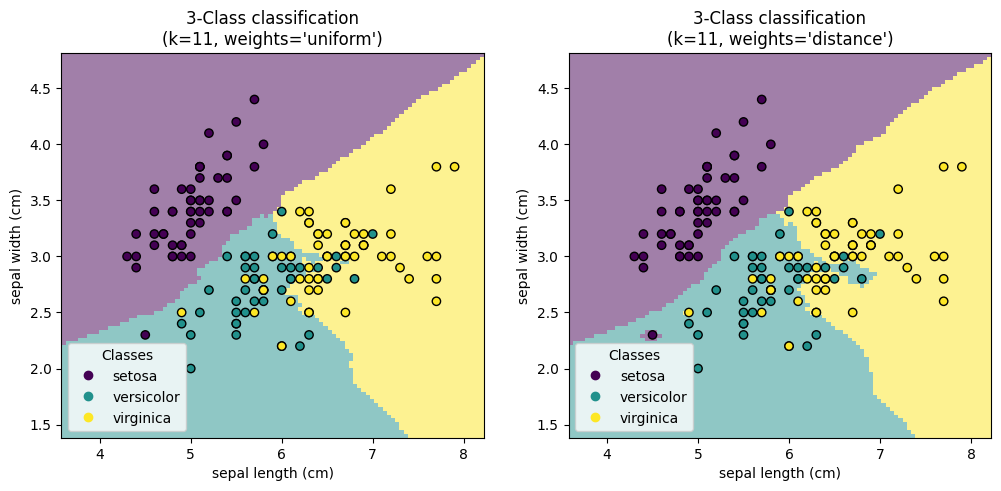

In [30]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()